In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from stockfish import Stockfish
import chess
import chess.engine
import math
import random
from evaluation_pipeline_copy import *
from plot_functions import *

In [60]:
# data = pd.read_csv('Valgte punkter fra ensemble')
df = pd.read_csv(r"chessData.csv")

In [61]:
data = generate_synthetic_data_dict(10,1,df,1)
data

['g7g6',
 'd1f3',
 'd8h4',
 'e1e2',
 'e8d7',
 'f1e2',
 'f8a3',
 'd1g4',
 'h8g8',
 'd1g4']

In [62]:
path=(r"stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe")

In [63]:
fen=(r"rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")

In [64]:
moves = generate_synthetic_data_dict(10,4,df,1)

scores = ensemble_score(moves, df)
scores

[-10, -54, -615, -181, -63, 0, -365, -100, -60, -484]

['g7g6', 'd1f3', 'd8h4', 'e1e2', 'e8d7', 'f1e2', 'f8a3', 'd1g4', 'h8g8', 'd1g4']


c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


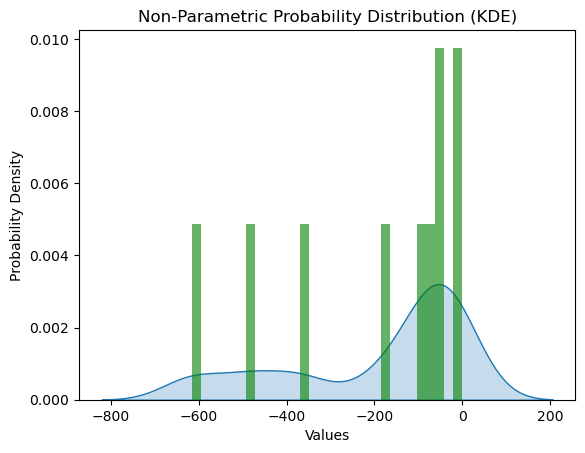

In [65]:
# Probability distribution
d = scores
print(data)

# Plot the KDE using seaborn
distribution_plot(d)

In [72]:
stockfish_score = stockfish_score_function(data, df)

NameError: name 'stockfish_score_function' is not defined

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


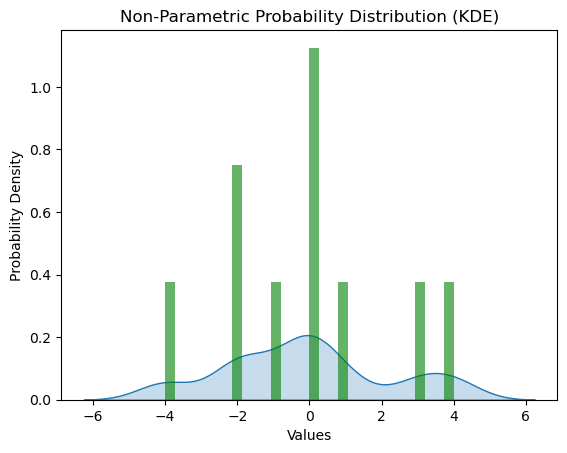

In [ ]:
distribution_plot(stockfish_score)

In [ ]:
values1 = stockfish_score
values2 = scores

# Note slight difference in the final result compared to Dawny33
print(KL(values1, values2))

[-1.99 -0.99  1.01  0.01 -1.99  3.01  0.01  4.01 -3.99  0.01] [  -3.99  -60.99 -612.99 -178.99  -73.99   -2.99 -358.99  -93.99  -58.99
 -475.99]
3.994649563538829
